In [1]:
import cv2
from operator import itemgetter

from detectors import Morph, HED
from lib.dress_checker import *
from lib.utils import plt_imshow, find_contours, draw_contours
from lib.ocr import ocr

OCR loaded!


(811, 1440, 3)
[RCF] loading...
[RCF] finished loading (0.0447 sec)
시작시간 : 2022-09-20 11:09:05.885391
종료시간 : 2022-09-20 11:09:06.151871
수행시간 : 0 초



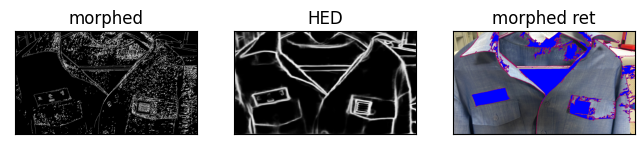

In [2]:
# full_dress_uniform, navy_service_uniform
org_img = cv2.imread('image/navy_service_uniform/2.jpg', cv2.IMREAD_COLOR)
print(org_img.shape)
# load Engine
morph_engine, HED_engine = Morph(), HED()

# get edge image
morphed_edge, ret = morph_engine.detect_edge(org_img)
hed_edge = HED_engine.detect_edge(org_img, 500, 500)
# _, mixed = morph_engine.detect_edge(hed_edge, isEdge=True)

cv2.imwrite('./res/res01.jpg', morphed_edge)
cv2.imwrite('./res/res02.jpg', hed_edge)
cv2.imwrite('./res/res03.jpg', ret)
# show
plt_imshow(["morphed", "HED", "morphed ret"], [morphed_edge, hed_edge, ret])

of_준_조_CHO


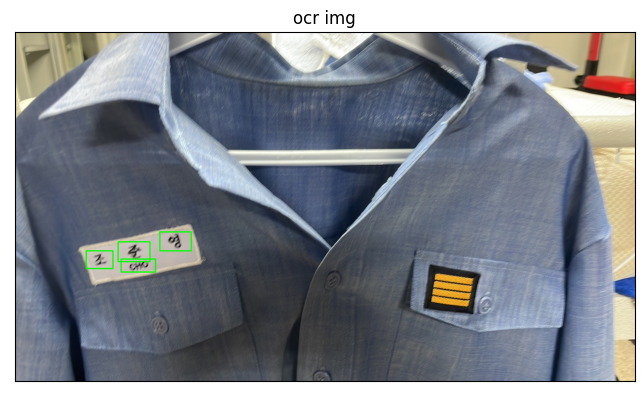

In [3]:
ocr_res = ocr(org_img)
ocr_str, ocr_img = itemgetter('str', 'img')(ocr_res)

cv2.imwrite('./res/res04.jpg', ocr_img)

print(ocr_str)
plt_imshow('ocr img', ocr_img)

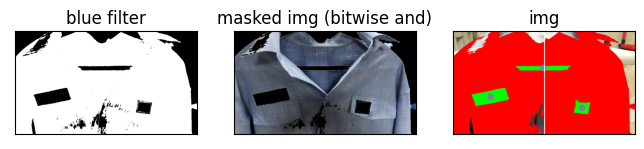

name_tag
class_tag


In [4]:
navy_service_uniform_status = checkNavyServiceUniform(org_img)
for name, contour in navy_service_uniform_status.items():
    print(name)

# checkFullDressUniform(org_img)

In [5]:
'''
for test

# load Engine
morph_engine, HED_engine = Morph(), HED()

# get edge image
morphed_edge, ret = morph_engine.detect_edge(org_img)
hed_edge = HED_engine.detect_edge(org_img, 500, 500)
# _, mixed = morph_engine.detect_edge(hed_edge, isEdge=True)

# show
plt_imshow(["morphed", "HED", "morphed ret"], [morphed_edge, hed_edge, ret])
# plt_imshow(["morphed", "HED", "mixed"], [morphed_edge, hed_edge, mixed])

~~~

# dst = cv2.bitwise_or(morphed_edge, hed_edge)
# ndst = cv2.bitwise_not(dst)
# plt_imshow(['dst', 'ndst'], [dst, ndst])
'''

'\nfor test\n\n# load Engine\nmorph_engine, HED_engine = Morph(), HED()\n\n# get edge image\nmorphed_edge, ret = morph_engine.detect_edge(org_img)\nhed_edge = HED_engine.detect_edge(org_img, 500, 500)\n# _, mixed = morph_engine.detect_edge(hed_edge, isEdge=True)\n\n# show\nplt_imshow(["morphed", "HED", "morphed ret"], [morphed_edge, hed_edge, ret])\n# plt_imshow(["morphed", "HED", "mixed"], [morphed_edge, hed_edge, mixed])\n\n~~~\n\n# dst = cv2.bitwise_or(morphed_edge, hed_edge)\n# ndst = cv2.bitwise_not(dst)\n# plt_imshow([\'dst\', \'ndst\'], [dst, ndst])\n'